<a href="https://colab.research.google.com/github/dipp-12/vowel-detection/blob/main/model_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def display_mfcc(x):
  waveform, sr = librosa.load(x)
  mfcc= librosa.feature.mfcc(waveform, sr)

  plt.figure(figsize=(10,4))
  librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
  plt.colorbar()
  plt.title(x)
  plt.tight_layout()
  plt.show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


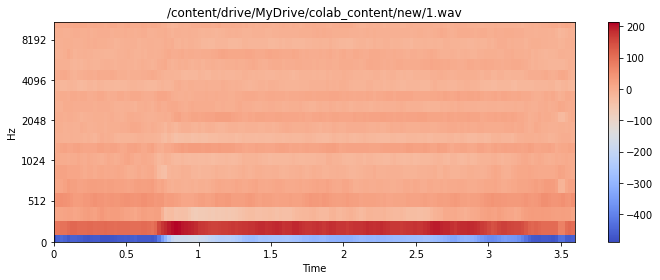

In [ ]:
display_mfcc('/content/drive/MyDrive/colab_content/new/1.wav')

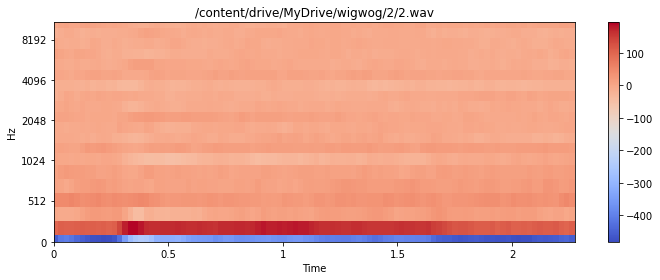

In [ ]:
display_mfcc('/content/drive/MyDrive/wigwog/2/2.wav')

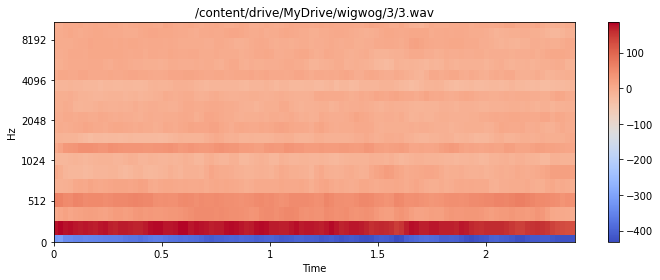

In [ ]:
display_mfcc('/content/drive/MyDrive/wigwog/3/3.wav')

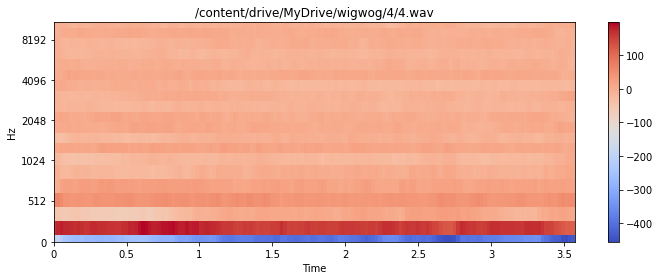

In [ ]:
display_mfcc('/content/drive/MyDrive/wigwog/4/4.wav')

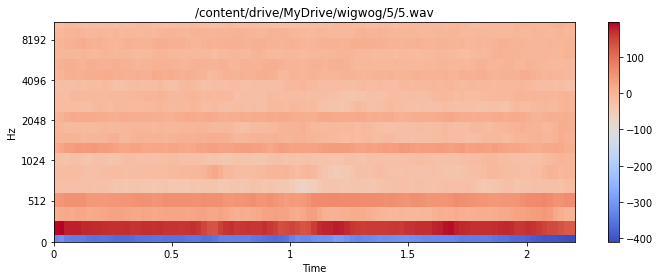

In [ ]:
display_mfcc('/content/drive/MyDrive/wigwog/5/5.wav')

In [ ]:
def extract_features_song(f):
  waveform, sr = librosa.load(f)

  #get mfcc
  mfcc = librosa.feature.mfcc(waveform, sr=22050, n_mfcc=40)
  print(mfcc.shape)

  return mfcc

In [ ]:
def generate_features_and_labels():
  all_features = []
  all_labels   = []
  label = 0

  labels = ['a','i','u','e','o']
  for labels in labels:
    sound_files = glob.glob('/content/drive/MyDrive/colab_content/new/'+labels+'/*.wav')
    print('Processing %d songs in %s labels' % (len(sound_files), labels))
    for f in sound_files:
      print(label)
      features = extract_features_song(f)
      all_features.append(features)
      all_labels.append(label)
    label += 1
  print('pass')
  return all_features, all_labels

In [ ]:
features, labels = generate_features_and_labels()

Processing 11 songs in a labels
0
(40, 155)
0
(40, 82)
0
(40, 124)
0
(40, 117)
0
(40, 141)
0
(40, 111)
0
(40, 124)
0
(40, 141)
0
(40, 117)
0
(40, 82)
0
(40, 111)
Processing 6 songs in i labels
1
(40, 98)
1
(40, 123)
1
(40, 140)
1
(40, 124)
1
(40, 116)
1
(40, 126)
Processing 6 songs in u labels
2
(40, 104)
2
(40, 123)
2
(40, 135)
2
(40, 135)
2
(40, 111)
2
(40, 126)
Processing 6 songs in e labels
3
(40, 154)
3
(40, 140)
3
(40, 89)
3
(40, 80)
3
(40, 155)
3
(40, 129)
Processing 6 songs in o labels
4
(40, 95)
4
(40, 144)
4
(40, 92)
4
(40, 122)
4
(40, 113)
4
(40, 146)
pass


In [ ]:
features = [librosa.util.fix_length(mfcc, 128) for mfcc in features]

In [ ]:
features = np.array(features)

In [ ]:
features.shape

(35, 40, 128)

In [ ]:
import random
import numpy as np
z = list(zip(features,labels))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(32, 3, input_shape=x.shape[1:], activation='relu'))
model.add(MaxPooling1D(2,2))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(2,2))
model.add(Conv1D(128,3,activation='relu'))
model.add(MaxPooling1D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 38, 32)            12320     
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 19, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 17, 64)            6208      
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 6, 128)            24704     
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 3, 128)          

In [ ]:
model.fit(
    x,
    y,
    batch_size=1,
    epochs=20,
    validation_split=0.2,
)

Epoch 1/20
28/28 [==============================] - 0s 7ms/step - loss: 4.6278e-06 - accuracy: 1.0000 - val_loss: 3.6187 - val_accuracy: 0.7143
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 4.5342e-06 - accuracy: 1.0000 - val_loss: 3.6174 - val_accuracy: 0.7143
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 4.4490e-06 - accuracy: 1.0000 - val_loss: 3.6146 - val_accuracy: 0.7143
Epoch 4/20
28/28 [==============================] - 0s 6ms/step - loss: 4.3469e-06 - accuracy: 1.0000 - val_loss: 3.6132 - val_accuracy: 0.7143
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 4.2958e-06 - accuracy: 1.0000 - val_loss: 3.6127 - val_accuracy: 0.7143
Epoch 6/20
28/28 [==============================] - 0s 3ms/step - loss: 4.2191e-06 - accuracy: 1.0000 - val_loss: 3.6086 - val_accuracy: 0.7143
Epoch 7/20
28/28 [==============================] - 0s 3ms/step - loss: 4.1297e-06 - accuracy: 1.0000 - val_loss: 3.6071 - val_accuracy: